<a href="https://colab.research.google.com/github/itayhorin/Notebooks/blob/main/optics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Ray:
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction

class Aperture:
    def __init__(self, position,n, radius):
        self.position = position
        self.n = n
        self.radius = radius

    def intersect(self, ray):
        L = self.position - ray.origin # P0 - L0 
        denom = np.dot(ray.direction, self.n)
        t = np.dot(L, self.n) / denom
        closest_point = ray.origin + t * ray.direction
        distance = np.linalg.norm(closest_point - self.position)
        if distance < self.radius and denom >1e-6:
            return True
        else:
            return False


class IsotropicSource:
    def __init__(self, radius):
        self.radius = radius

    def generate_ray(self):
       # direction = np.random.rand(3) - 0.5
        angle1 = np.random.uniform(0,2*np.pi)
        x = np.cos(angle1) * np.sqrt(np.random.uniform(0,1)) * self.radius
        y = np.sin(angle1) * np.sqrt(np.random.uniform(0,1)) * self.radius
        z = 0
        position = np.array([x,y,z])
        direction = np.random.normal(size = 3)
        direction /= np.linalg.norm(direction)
        return Ray(position, direction)


def r_col(x):
  tanx = (55/2-2)/500
  d = tanx*x
  col_r = 4 + 2*d
  return col_r
def runSim(aperture1 , aperture2 , source , nps = 1e5):
  num_rays = nps
  final_positions = []
  passed_rays = []
  for i in range(num_rays):
      ray = source.generate_ray()
      if aperture1.intersect(ray) and aperture2.intersect(ray):
        # scale to z = 5
          t = (5 - ray.origin[2]) / ray.direction[2]
          final_positions.append(ray.origin +t*ray.direction)
          passed_rays.append(ray)
  return final_positions , passed_rays

def plots(final_positions , grids =20):
  fig , ax = plt.subplots(1,2 , figsize = (5,5))
  fig.subplots_adjust(hspace=0.5, left=0.07, right=1.93)
  final_positions_x = [p[0] for p in final_positions]
  final_positions_y = [p[1] for p in final_positions]
  final_positions_z = [p[2] for p in final_positions]
  ax[0].scatter(final_positions_x, final_positions_y, c='b' , s = 0.1)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_aspect('equal', adjustable='box')
  ax[1].hexbin(x = final_positions_x , y = final_positions_y , gridsize = grids , cmap = 'inferno') 
  #plt.tight_layout(pad = 2)
  plt.show() 

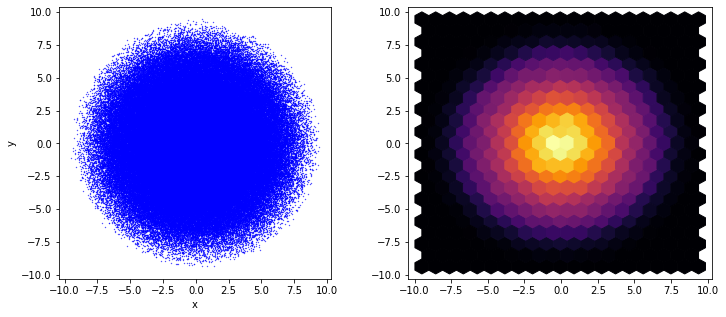

In [199]:
# Example usage:
source = IsotropicSource(radius = 2)
aperture1 = Aperture(np.array([0, 0, 0.2]),np.array([0, 0, 1]), 4.0204)
aperture2 = Aperture(np.array([0, 0, 2.7]),np.array([0, 0, 1]), 4.2754)
a,b = runSim(aperture1 , aperture2 , source , 1000000)
plots(a)

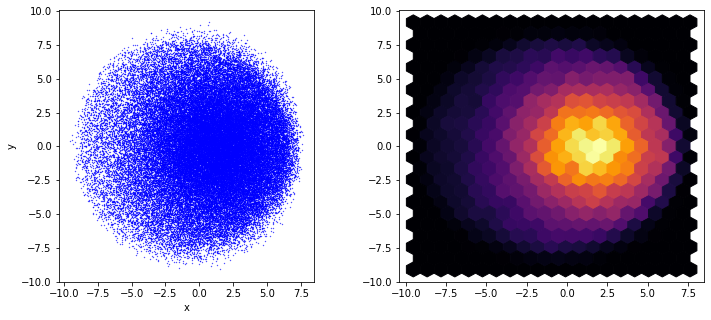

In [200]:
# Example usage:
source = IsotropicSource(radius = 2)
aperture1 = Aperture(np.array([4.5, 0, 0.2]),np.array([0, 0, 1]), 4.0204)
aperture2 = Aperture(np.array([0, 0, 2.7]),np.array([0, 0, 1]), 4.2754)
a,b = runSim(aperture1 , aperture2 , source , 1000000)
plots(a)

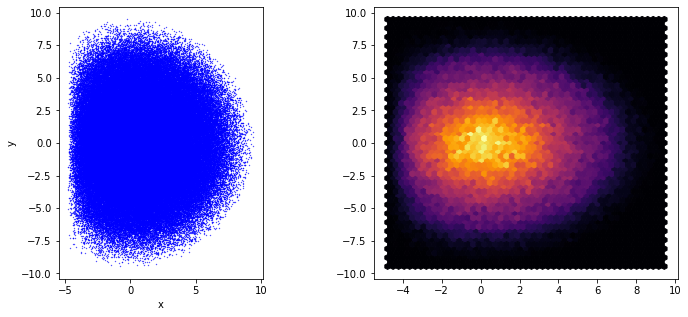

In [201]:
# Example usage:
source = IsotropicSource(radius = 2)
aperture1 = Aperture(np.array([0, 0, 0.2]),np.array([1, 0, 1]), 4.0204)
aperture2 = Aperture(np.array([0, 0, 2.7]),np.array([0, 0, 1]), 4.2754)
a,b = runSim(aperture1 , aperture2 , source , 1000000)
plots(a , 50)

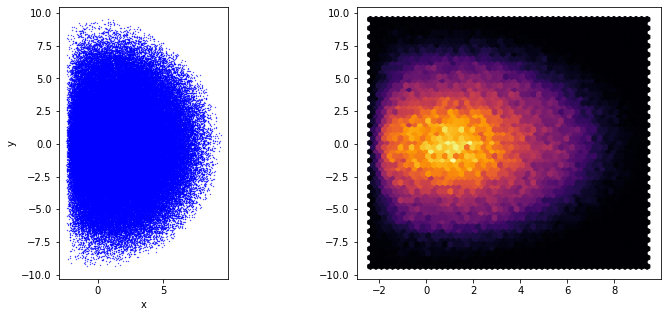

In [202]:
# Example usage:
source = IsotropicSource(radius = 2)
aperture1 = Aperture(np.array([0, 0, 0.2]),np.array([2, 0, 1]), 4.0204)
aperture2 = Aperture(np.array([0, 0, 2.7]),np.array([0, 0, 1]), 4.2754)
a,b = runSim(aperture1 , aperture2 , source , 1000000)
plots(a,50)